## Project : 1 Ames Housing Data

#### Objective : perform the exploratory data analysis on the data.

---

### Data Analysis Questions with Pandas

1. **Missing Values Check**

   * Which columns have the most missing values, and how many missing values are there in each?

2. **Distribution of Target Variable**

   * What is the distribution of `SalePrice` (mean, median, standard deviation, skewness)?

3. **Categorical Frequency Analysis**

   * What are the most common `Neighborhood`s in the dataset, and how many houses are sold in each?

4. **Price by Neighborhood**

   * What is the average `SalePrice` in each `Neighborhood`, and which neighborhoods are the most/least expensive?

5. **Impact of House Quality**

   * How does `Overall Qual` (Overall Quality) correlate with `SalePrice`?

6. **House Age and Price**

   * What is the relationship between `Year Built` and `SalePrice`? Do newer houses generally sell for higher prices?

7. **Garage Effect**

   * Does having a garage (`Garage Type`, `Garage Area`, `Garage Cars`) significantly impact the `SalePrice`?

8. **Living Area vs Price**

   * What is the correlation between `Gr Liv Area` (Above-ground living area in square feet) and `SalePrice`?

9. **Effect of Bathrooms & Bedrooms**

   * How do the number of bathrooms (`Full Bath` + `Half Bath` + `Bsmt Full Bath`) and bedrooms (`Bedroom AbvGr`) affect `SalePrice`?

10. **Seasonal Trend**

* Do houses sold in certain months (`Mo Sold`) or years (`Yr Sold`) tend to have higher/lower `SalePrice`?

---


In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("Ames_Housing_Data.csv")

In [5]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
data.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

## 1.Missing Values Check

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [8]:
data.shape

(2930, 81)

<Axes: >

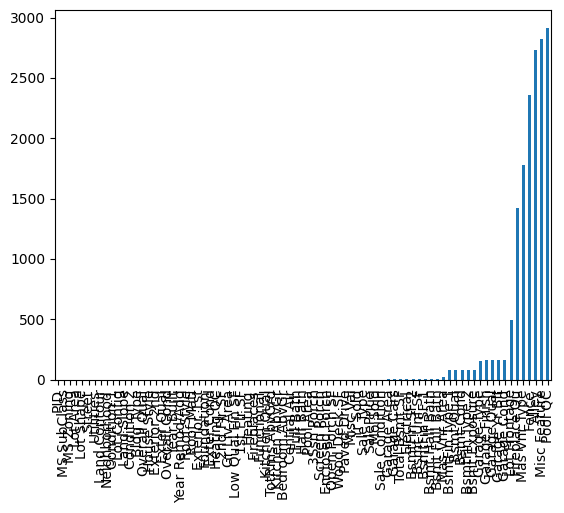

In [9]:
data.isna().sum().sort_values().plot(kind='bar')

## 2. Sales price distribution

In [10]:
data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

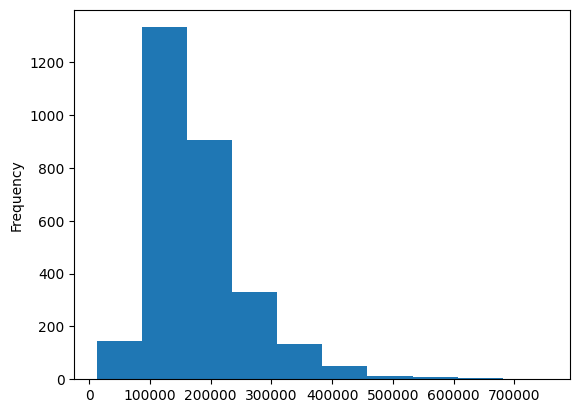

In [11]:
data['SalePrice'].plot(kind='hist')

## 3. Neighborhood Analysis

<Axes: xlabel='Neighborhood'>

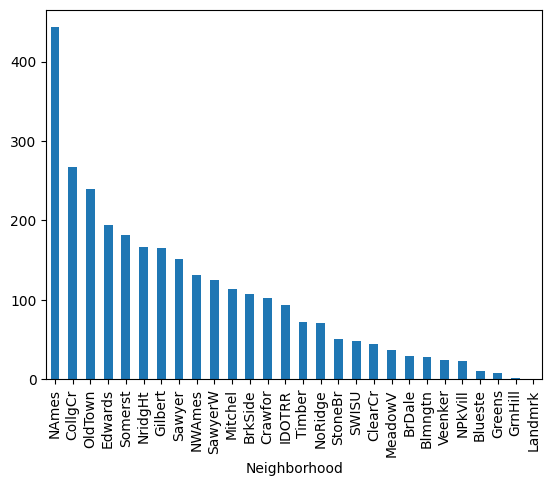

In [12]:
data['Neighborhood'].value_counts().plot(kind='bar')

## 4.Price by Neighborhood

<Axes: xlabel='Neighborhood'>

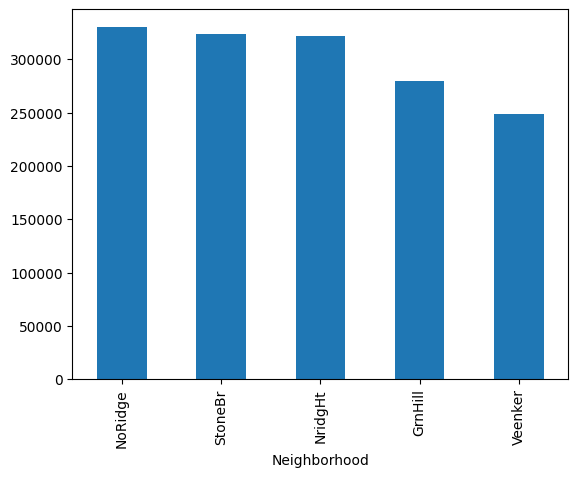

In [13]:
data.groupby(['Neighborhood'])['SalePrice'].mean().sort_values(ascending=False).head(5).plot(kind='bar')

## 5. Impact of House Quality

In [14]:
data['Overall Qual'].unique()

array([ 6,  5,  7,  8,  9,  4,  3,  2, 10,  1])

In [15]:
data[['Overall Qual','SalePrice']].corr()

,Overall Qual,SalePrice
Overall Qual,1.000000,0.799262
SalePrice,0.799262,1.000000


<Axes: xlabel='Overall Qual'>

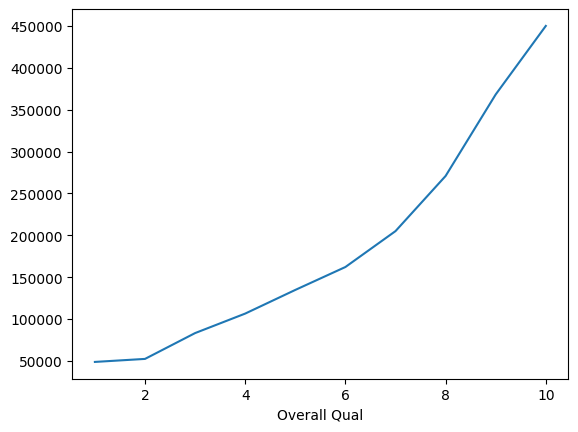

In [16]:
data.groupby(['Overall Qual'])['SalePrice'].mean().plot()

## 6.House Age and Price

In [17]:
data['Year Built'].nunique()

118

In [18]:
data['Year Built'].describe()

count    2930.000000
mean     1971.356314
std        30.245361
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: Year Built, dtype: float64

<Axes: xlabel='Year Built'>

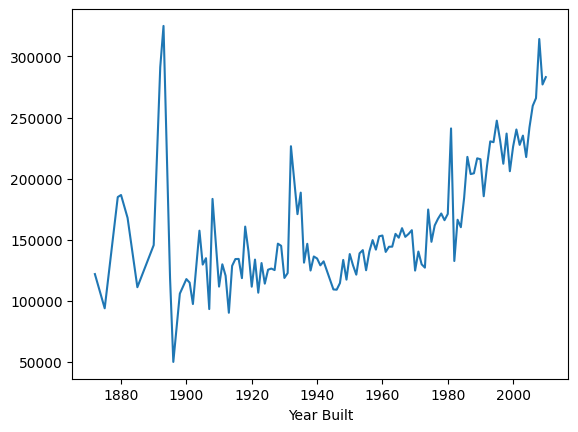

In [19]:
data.groupby(['Year Built'])['SalePrice'].mean().sort_index().plot()

In [20]:
data.groupby(['Year Built'])['SalePrice'].mean().sort_values(ascending=False).head(20)

Year Built
1893    325000.000000
2008    314300.224490
1892    291250.000000
2010    283116.000000
2009    277097.440000
2007    265924.935780
2006    259623.847826
1995    247500.000000
2005    241993.718310
1981    241150.000000
2001    240282.857143
1998    236937.234043
2003    235270.409091
1996    231687.941176
1993    230558.750000
1994    229898.675676
2002    227696.595745
1932    226586.800000
2000    226367.708333
1986    217863.636364
Name: SalePrice, dtype: float64

## 7. Garage and Sales Price 

(`Garage Type`, `Garage Area`, `Garage Cars`)

In [21]:
data['Garage Type'].unique()

array(['Attchd', 'BuiltIn', 'Basment', 'Detchd', nan, 'CarPort', '2Types'],
      dtype=object)

<Axes: xlabel='Garage Type'>

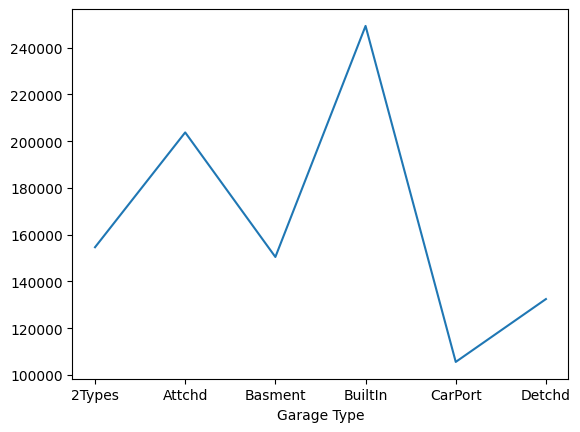

In [22]:
data.groupby(['Garage Type'])['SalePrice'].mean().plot(kind='line')

In [23]:
data['Garage Cars'].unique()

array([ 2.,  1.,  3.,  0.,  4.,  5., nan])

<Axes: xlabel='Garage Cars'>

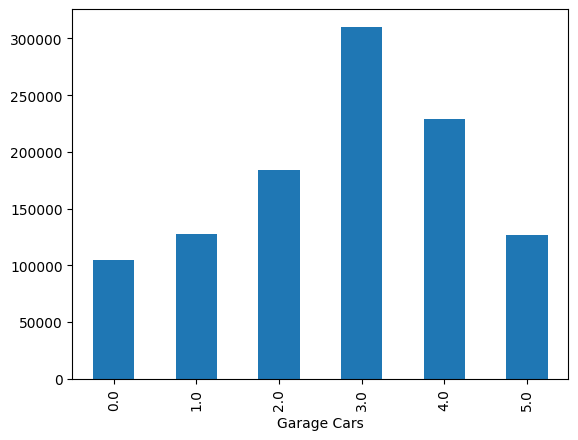

In [24]:
data.groupby(['Garage Cars'])['SalePrice'].mean().plot(kind='bar')

## 8. Living Area and Price

In [25]:
data['Gr Liv Area'].unique()

array([1656,  896, 1329, ..., 2028, 2521, 1003], shape=(1292,))

In [26]:
data[['Gr Liv Area','SalePrice']].corr()

,Gr Liv Area,SalePrice
Gr Liv Area,1.00000,0.70678
SalePrice,0.70678,1.00000


In [30]:
data.groupby(['Gr Liv Area'])['SalePrice'].mean().sort_values(ascending=False).head(10)

Gr Liv Area
4316    755000.0
4476    745000.0
3627    625000.0
2470    615000.0
2364    611657.0
2674    610000.0
2338    591587.0
3500    584500.0
2822    582933.0
2868    556581.0
Name: SalePrice, dtype: float64

## 9. Bathroom and Price

In [31]:


data['Full Bath'].unique()

array([1, 2, 3, 0, 4])

<Axes: xlabel='Full Bath'>

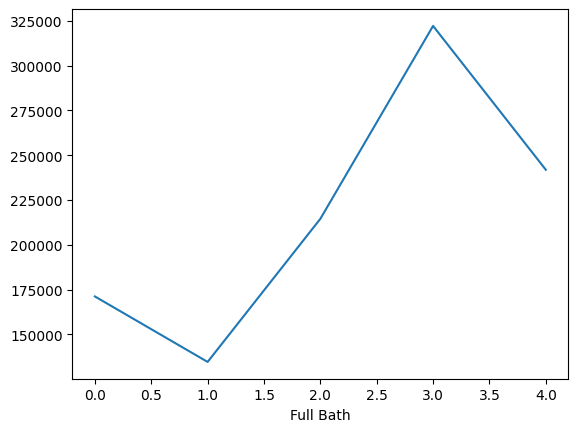

In [32]:
data.groupby(['Full Bath'])['SalePrice'].mean().plot()

## 10. Seasonal trend and Price

In [33]:
data['Mo Sold'].unique()

array([ 5,  6,  4,  3,  1,  2,  7, 10,  8, 11,  9, 12])

<Axes: xlabel='Mo Sold'>

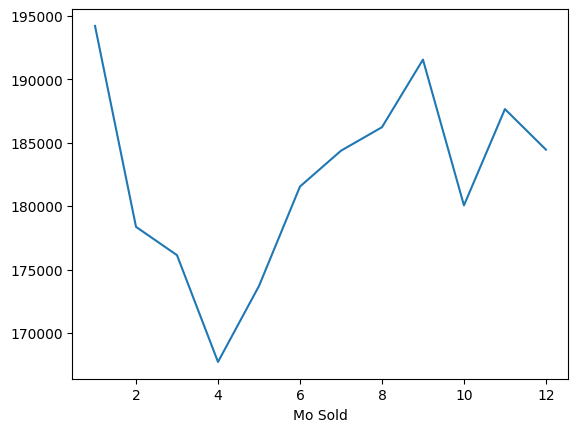

In [34]:
data.groupby(['Mo Sold'])['SalePrice'].mean().plot()

In [37]:
year - 2000 (Jan , Feb, Mar), 2001 (Apr, May, Jun)

<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
C:\Users\Indumathi\AppData\Local\Temp\ipykernel_20020\1140242913.py:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  year - 2000 (Jan , Feb, Mar), 2001 (Apr, May, Jun)
C:\Users\Indumathi\AppData\Local\Temp\ipykernel_20020\1140242913.py:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  year - 2000 (Jan , Feb, Mar), 2001 (Apr, May, Jun)


NameError: name 'year' is not defined

In [36]:
data['Yea']

KeyError: 'Yea'

In [ ]:
data.groupby(['Year Built','Mo Sold'])['SalePrice'].mean().sort_index()